In [1]:
import numpy as np
import pandas as pd
import datetime as DT
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, plot_precision_recall_curve
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
plt.style.use('seaborn')
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('CCFD_Final_Dataset.csv')
data.head()

,Time,amt,zip,lat,long,city_pop,merch_lat,merch_long,Cust_City,Tran_State,Tran_Category,Month,age,sex,is_fraud
0,0.0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0,0,0,1,33.0,1,0
1,0.0,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,1,1,1,1,43.0,1,0
2,0.0,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,2,2,2,1,59.0,0,0
3,1.0,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,3,3,3,1,54.0,0,0
4,3.0,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,4,4,4,1,35.0,0,0


In [3]:
data.shape

(1048575, 15)

In [4]:
valid=data[data.is_fraud==0]

In [5]:
valid.shape

(1042569, 15)

In [6]:
fraud=data[data.is_fraud==1]
fraud.shape

(6006, 15)

In [7]:
data['amt'].describe()

count    1.048575e+06
mean     7.027910e+01
std      1.599518e+02
min      1.000000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.305000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [8]:
data.groupby('is_fraud').mean()

,Time,amt,zip,lat,long,city_pop,merch_lat,merch_long,Cust_City,Tran_State,Tran_Category,Month,age,sex
is_fraud,,,,,,,,,,,,,,
0,797.154262,67.627445,48805.355338,38.532842,-90.228376,89015.900200,38.532993,-90.228625,370.996427,21.869969,6.541596,6.518686,47.260116,0.547679
1,864.681985,530.573492,48148.078422,38.623988,-89.858250,96323.951715,38.615091,-89.853555,439.011156,22.471362,4.402764,5.839660,49.804529,0.495338


In [9]:
valid_samp=valid.sample(n=10000)

In [10]:
new_data=pd.concat([valid_samp, fraud], axis=0)

In [11]:
new_data.shape

(1048575, 15)

In [12]:
new_data['is_fraud'].value_counts()

0    1042569
1       6006
Name: is_fraud, dtype: int64

In [13]:
new_data.groupby('is_fraud').mean()

,Time,amt,zip,lat,long,city_pop,merch_lat,merch_long,Cust_City,Tran_State,Tran_Category,Month,age,sex
is_fraud,,,,,,,,,,,,,,
0,797.154262,67.627445,48805.355338,38.532842,-90.228376,89015.900200,38.532993,-90.228625,370.996427,21.869969,6.541596,6.518686,47.260116,0.547679
1,864.681985,530.573492,48148.078422,38.623988,-89.858250,96323.951715,38.615091,-89.853555,439.011156,22.471362,4.402764,5.839660,49.804529,0.495338


In [14]:
print('Data Shape:', new_data.shape)
x = new_data.iloc[: , :-1]
y = new_data.iloc[: , -1]
print('X shape:', x.shape)
print('Y shape:', y.shape)

Data Shape: (1048575, 15)
X shape: (1048575, 14)
Y shape: (1048575,)


In [15]:
classes = {0:'Not Fraud', 1:'Fraud'}
classes_names = {'Not Fraud', 'Fraud'}
print(new_data.is_fraud.value_counts().rename(index = classes))

Not Fraud    1042569
Fraud           6006
Name: is_fraud, dtype: int64


In [16]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, stratify=y, random_state=2, shuffle=True) 

In [17]:
print(x_train.shape, y_train.shape, x_test.shape)

(734002, 14) (734002,) (314573, 14)


Logistic Regression Train Score: 99.36
Logistic Regression Test Score: 99.36


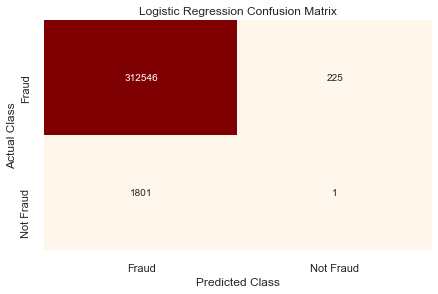

Accuracy: 99.356
Precision: 0.442
Recall: 0.055
F1_Score: 0.099
Specifity: 99.928


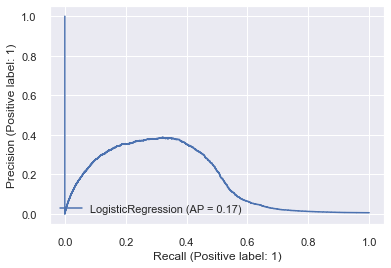

In [18]:
LogisticRegressionModel = LogisticRegression(max_iter=200)
LogisticRegressionModel.fit(x_train, y_train)
LogisticRegressionModel_y_pred = LogisticRegressionModel.predict(x_test)

LogisticRegressionModel_TrainScore = round(LogisticRegressionModel.score(x_train, y_train)* 100, 2)
LogisticRegressionModel_TestScore = round(LogisticRegressionModel.score(x_test, y_test)* 100, 2)

print('Logistic Regression Train Score:', LogisticRegressionModel_TrainScore)
print('Logistic Regression Test Score:', LogisticRegressionModel_TestScore)

LogisticRegressionModel_CM = confusion_matrix(y_test, LogisticRegressionModel_y_pred)
LogisticRegressionModel_ConfusionMatrix = pd. DataFrame(LogisticRegressionModel_CM, index=classes_names, columns=classes_names)

sns.heatmap(LogisticRegressionModel_ConfusionMatrix, annot=True, cbar=None, cmap="OrRd", fmt = 'g')
plt.title("Logistic Regression Confusion Matrix"), plt.tight_layout()
plt.ylabel("Actual Class"), plt.xlabel("Predicted Class")
plt.show()

Accuracy_LR = round((accuracy_score(y_test, LogisticRegressionModel_y_pred))*100, 3)
Precision_LR = round((precision_score(y_test, LogisticRegressionModel_y_pred))*100, 3)
Recall_LR = round((recall_score(y_test, LogisticRegressionModel_y_pred))*100, 3)
F1_Score_LR = round((f1_score(y_test, LogisticRegressionModel_y_pred))*100, 3)
Specificity_LR = round(metrics.recall_score(y_test, LogisticRegressionModel_y_pred, pos_label=0)*100, 3)
print("Accuracy:", Accuracy_LR)
print("Precision:", Precision_LR)
print("Recall:", Recall_LR)
print("F1_Score:", F1_Score_LR)
print("Specifity:", Specificity_LR)

disp = plot_precision_recall_curve(LogisticRegressionModel, x_test, y_test)

SVC Train Score:  99.47
SVC Test Score:  99.42


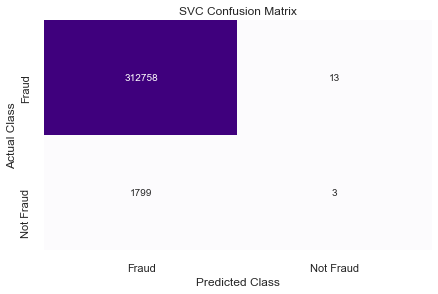

Accuracy: 99.424
Precision: 18.75
Recall: 0.166
F1_Score: 0.33
Specifity: 99.996


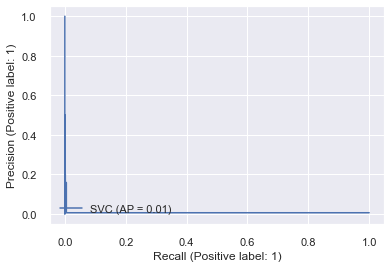

In [19]:
#SVC Model
SVCModel = SVC(kernel= 'rbf', max_iter=300, C=1.0, gamma='auto', probability= True)
SVCModel.fit(x_train, y_train)
SVCModel_y_pred = SVCModel.predict(x_test)

#Score
SVCModel_TrainScore =  round(SVCModel.score(x_train, y_train) * 100, 2)
SVCModel_TestScore = round(SVCModel.score(x_test, y_test) * 100, 2)

print('SVC Train Score: ', SVCModel_TrainScore)
print('SVC Test Score: ',SVCModel_TestScore)


#Confusion Matrix
SVCModel_CM = confusion_matrix(y_test, SVCModel_y_pred)
SVCModel_ConfusionMatrix = pd.DataFrame(SVCModel_CM, index=classes_names, columns=classes_names)

sns.heatmap(SVCModel_ConfusionMatrix, annot=True, cbar=None, cmap="Purples", fmt = 'g')

plt.title("SVC Confusion Matrix"), plt.tight_layout()
plt.ylabel("Actual Class"), plt.xlabel("Predicted Class")
plt.show()

#Metrics
Accuracy_SVM = round((accuracy_score(y_test, SVCModel_y_pred))*100, 3)
Precision_SVM = round((precision_score(y_test, SVCModel_y_pred))*100, 3)
Recall_SVM = round((recall_score(y_test, SVCModel_y_pred))*100, 3)
F1_Score_SVM = round((f1_score(y_test, SVCModel_y_pred))*100, 3)
Specificity_SVM = round(metrics.recall_score(y_test, SVCModel_y_pred, pos_label=0)*100, 3)
print("Accuracy:", Accuracy_SVM)
print("Precision:", Precision_SVM)
print("Recall:", Recall_SVM)
print("F1_Score:", F1_Score_SVM)
print("Specifity:", Specificity_SVM)

disp = plot_precision_recall_curve(SVCModel, x_test, y_test)

Decision Tree Train Score:  99.71
Decision Tree Test Score:  99.71


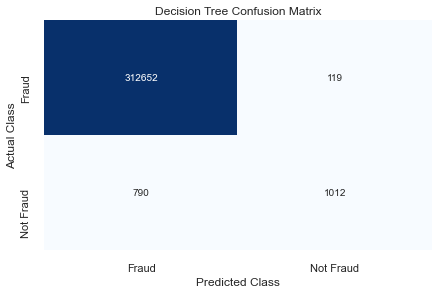

Accuracy: 99.711
Precision: 89.478
Recall: 56.16
F1_Score: 69.008
Specifity: 99.962


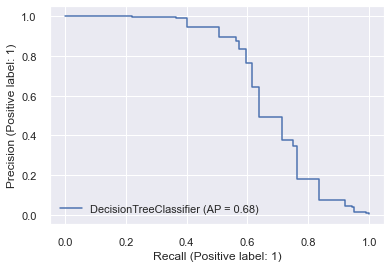

In [20]:
#Decision Tree Model
DecisionTreeModel = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=33) #criterion can be entropy
DecisionTreeModel.fit(x_train, y_train)
DecisionTreeModel_y_pred = DecisionTreeModel.predict(x_test)


#Score
DecisionTreeModel_TrainScore =  round(DecisionTreeModel.score(x_train, y_train) * 100, 2)
DecisionTreeModel_TestScore = round(DecisionTreeModel.score(x_test, y_test) * 100, 2)

print('Decision Tree Train Score: ' , DecisionTreeModel_TrainScore)
print('Decision Tree Test Score: ' , DecisionTreeModel_TestScore)


#Confusion Matrix
DecisionTreeModel_CM = confusion_matrix(y_test, DecisionTreeModel_y_pred)
DecisionTreeModel_ConfusionMatrix = pd.DataFrame(DecisionTreeModel_CM, index=classes_names, columns=classes_names)

sns.heatmap(DecisionTreeModel_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Decision Tree Confusion Matrix"), plt.tight_layout()
plt.ylabel("Actual Class"), plt.xlabel("Predicted Class")
plt.show()

#Metrics
Accuracy_DT = round((accuracy_score(y_test, DecisionTreeModel_y_pred))*100, 3)
Precision_DT = round((precision_score(y_test, DecisionTreeModel_y_pred))*100, 3)
Recall_DT = round((recall_score(y_test, DecisionTreeModel_y_pred))*100, 3)
F1_Score_DT = round((f1_score(y_test, DecisionTreeModel_y_pred))*100, 3)
Specificity_DT = round(metrics.recall_score(y_test, DecisionTreeModel_y_pred, pos_label=0)*100, 3)
print("Accuracy:", Accuracy_DT)
print("Precision:", Precision_DT)
print("Recall:", Recall_DT)
print("F1_Score:", F1_Score_DT)
print("Specifity:", Specificity_DT)

disp = plot_precision_recall_curve(DecisionTreeModel, x_test, y_test)

RandomForestModel Train Score:  99.54
RandomForestModel Test Score:  99.54


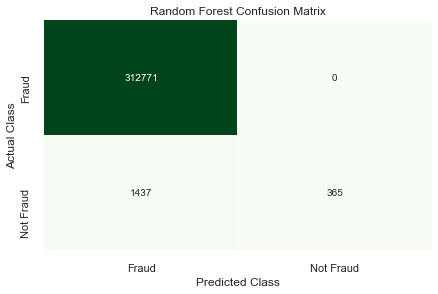

Accuracy: 99.543
Precision: 100.0
Recall: 20.255
F1_Score: 33.687
Specifity: 100.0


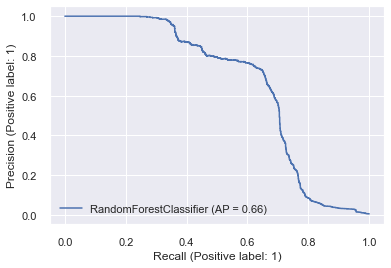

In [21]:
#Random Forest Model
RandomForestModel = RandomForestClassifier(criterion = 'gini',n_estimators=200,max_depth=5,random_state=33, n_jobs=-1)
RandomForestModel.fit(x_train, y_train)
RandomForestModel_y_pred = RandomForestModel.predict(x_test)


#Score
RandomForestModel_TrainScore =  round(RandomForestModel.score(x_train, y_train) * 100, 2)
RandomForestModel_TestScore = round(RandomForestModel.score(x_test, y_test) * 100, 2)

print('RandomForestModel Train Score: ' , RandomForestModel_TrainScore)
print('RandomForestModel Test Score: ' , RandomForestModel_TestScore)


#Confusion Matrix
RandomForestModel_CM = confusion_matrix(y_test, RandomForestModel_y_pred)
RandomForestModel_ConfusionMatrix = pd.DataFrame(RandomForestModel_CM, index=classes_names, columns=classes_names)

sns.heatmap(RandomForestModel_ConfusionMatrix, annot=True, cbar=None, cmap ="Greens", fmt = 'g')
plt.title("Random Forest Confusion Matrix"), plt.tight_layout()
plt.ylabel("Actual Class"), plt.xlabel("Predicted Class")
plt.show()

#Metrics
Accuracy_RF = round((accuracy_score(y_test, RandomForestModel_y_pred))*100, 3)
Precision_RF = round((precision_score(y_test, RandomForestModel_y_pred))*100, 3)
Recall_RF = round((recall_score(y_test, RandomForestModel_y_pred))*100, 3)
F1_Score_RF = round((f1_score(y_test, RandomForestModel_y_pred))*100, 3)
Specificity_RF = round(metrics.recall_score(y_test, RandomForestModel_y_pred, pos_label=0)*100, 3)
print("Accuracy:", Accuracy_RF)
print("Precision:", Precision_RF)
print("Recall:", Recall_RF)
print("F1_Score:", F1_Score_RF)
print("Specifity:", Specificity_RF)

disp = plot_precision_recall_curve(RandomForestModel, x_test, y_test)

Bayes Train Score:  99.15
Bayes Test Score:  99.15


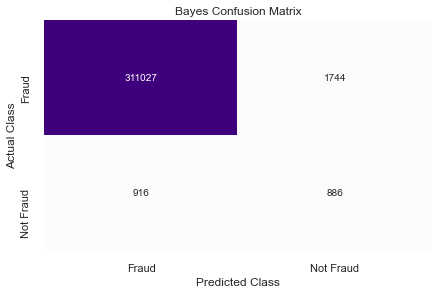

Specifity: 99.442
Accuracy: 99.154
Precision: 33.688
Recall: 49.168
F1_Score: 39.982


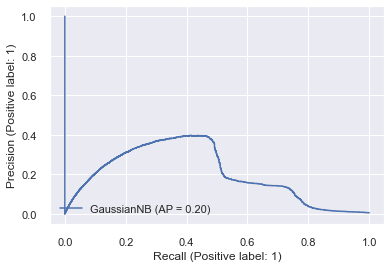

In [22]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
#Predict Output
gauss_pred = gaussian.predict(x_test)

gaussian_TrainScore =  round(gaussian.score(x_train, y_train) * 100, 2)
gaussian_TestScore = round(gaussian.score(x_test, y_test) * 100, 2)

print('Bayes Train Score: ', gaussian_TrainScore)
print('Bayes Test Score: ',gaussian_TestScore)


#Confusion Matrix
gaussian_CM = confusion_matrix(y_test, gauss_pred)
gaussian_ConfusionMatrix = pd.DataFrame(gaussian_CM, index=classes_names, columns=classes_names)

sns.heatmap(gaussian_ConfusionMatrix, annot=True, cbar=None, cmap="Purples", fmt = 'g')

plt.title("Bayes Confusion Matrix"), plt.tight_layout()
plt.ylabel("Actual Class"), plt.xlabel("Predicted Class")
plt.show()

#Metrics
Accuracy_NB = round((accuracy_score(y_test, gauss_pred))*100, 3)
Precision_NB = round((precision_score(y_test, gauss_pred))*100, 3)
Recall_NB = round((recall_score(y_test, gauss_pred))*100, 3)
F1_Score_NB = round((f1_score(y_test, gauss_pred))*100, 3)
Specificity_NB = round(metrics.recall_score(y_test, gauss_pred, pos_label=0)*100, 3)

print("Specifity:", Specificity_NB)
print("Accuracy:", Accuracy_NB)
print("Precision:", Precision_NB)
print("Recall:", Recall_NB)
print("F1_Score:", F1_Score_NB)

disp = plot_precision_recall_curve(gaussian, x_test, y_test)

classifier created
KNN Train Score:  99.67
KNN Test Score:  99.59


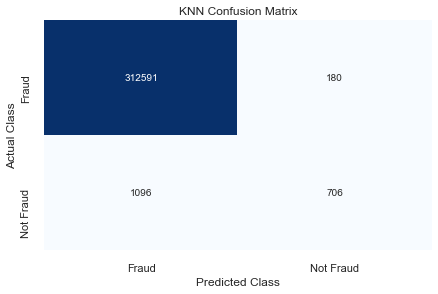

Accuracy: 99.594
Precision: 79.684
Recall: 39.179
F1_Score: 52.53
Specifity: 99.942


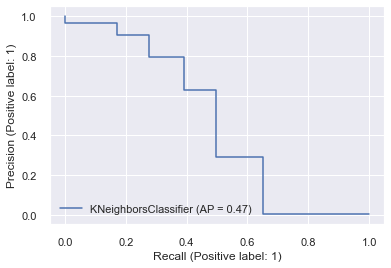

In [23]:
knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
knn.fit(x_train,y_train)
print("classifier created")
knn_y_pred = knn.predict(x_test)
knn_TrainScore = round(knn.score(x_train, y_train) * 100, 2)
knn_TestScore = round(knn.score(x_test, y_test) * 100, 2)

print('KNN Train Score: ' , knn_TrainScore)
print('KNN Test Score: ' , knn_TestScore)


#Confusion Matrix
knn_CM = confusion_matrix(y_test, knn_y_pred)
knn_ConfusionMatrix = pd.DataFrame(knn_CM, index=classes_names, columns=classes_names)

sns.heatmap(knn_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("KNN Confusion Matrix"), plt.tight_layout()
plt.ylabel("Actual Class"), plt.xlabel("Predicted Class")
plt.show()

#Metrics
Accuracy_KNN = round((accuracy_score(y_test, knn_y_pred))*100, 3)
Precision_KNN = round((precision_score(y_test, knn_y_pred))*100, 3)
Recall_KNN = round((recall_score(y_test, knn_y_pred))*100, 3)
F1_Score_KNN = round((f1_score(y_test, knn_y_pred))*100, 3)
Specificity_KNN = round(metrics.recall_score(y_test, knn_y_pred, pos_label=0)*100, 3)
print("Accuracy:", Accuracy_KNN)
print("Precision:", Precision_KNN)
print("Recall:", Recall_KNN)
print("F1_Score:", F1_Score_KNN)
print("Specifity:", Specificity_KNN)

disp = plot_precision_recall_curve(knn, x_test, y_test)


In [24]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'K Nearest Neighbour'],
    'Train Score': [LogisticRegressionModel_TrainScore, SVCModel_TrainScore, DecisionTreeModel_TrainScore, RandomForestModel_TrainScore, gaussian_TrainScore, knn_TrainScore],
    'Test Score/Accuracy': [LogisticRegressionModel_TestScore, SVCModel_TestScore, DecisionTreeModel_TestScore, RandomForestModel_TestScore, gaussian_TestScore, knn_TestScore],
'Precision': [Precision_LR, Precision_SVM, Precision_DT, Precision_RF, Precision_NB, Precision_KNN],
'Recall': [Recall_LR, Recall_SVM, Recall_DT, Recall_RF, Recall_NB, Recall_KNN],
'F1_Score': [F1_Score_LR, F1_Score_SVM, F1_Score_DT, F1_Score_RF, F1_Score_NB, F1_Score_KNN],
'Specificity': [Specificity_LR, Specificity_SVM, Specificity_DT, Specificity_RF, Specificity_NB, Specificity_KNN]})

models.sort_values(['Train Score', 'Test Score/Accuracy', 'Precision', 'Recall', 'F1_Score', 'Specificity'], ascending=[False, False, False, False, False, False])

,Model,Train Score,Test Score/Accuracy,Precision,Recall,F1_Score,Specificity
2,Decision Tree,99.71,99.71,89.478,56.160,69.008,99.962
5,K Nearest Neighbour,99.67,99.59,79.684,39.179,52.530,99.942
3,Random Forest,99.54,99.54,100.000,20.255,33.687,100.000
1,Support Vector Machines,99.47,99.42,18.750,0.166,0.330,99.996
0,Logistic Regression,99.36,99.36,0.442,0.055,0.099,99.928
4,Naive Bayes,99.15,99.15,33.688,49.168,39.982,99.442


In [25]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'K Nearest Neighbour'],
    'Test Score/Accuracy': [LogisticRegressionModel_TestScore, SVCModel_TestScore, DecisionTreeModel_TestScore, RandomForestModel_TestScore, gaussian_TestScore, knn_TestScore],'Specificity': [Specificity_LR, Specificity_SVM, Specificity_DT, Specificity_RF, Specificity_NB, Specificity_KNN]})

models.sort_values(['Test Score/Accuracy', 'Specificity'], ascending=[False, False])

,Model,Test Score/Accuracy,Specificity
2,Decision Tree,99.71,99.962
5,K Nearest Neighbour,99.59,99.942
3,Random Forest,99.54,100.000
1,Support Vector Machines,99.42,99.996
0,Logistic Regression,99.36,99.928
4,Naive Bayes,99.15,99.442


## ROC Curve

In [26]:
from sklearn.metrics import roc_curve
model1 = LogisticRegression(max_iter=200)
model2 = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
model3 = GaussianNB()
model4 = RandomForestClassifier(criterion = 'gini', n_estimators=200, max_depth=5, random_state=33, n_jobs=-1)
model5 = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=33)
model6 = SVC(kernel= 'rbf', max_iter=300, C=1.0, gamma='auto', probability=True)

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)
model4.fit(x_train, y_train)
model5.fit(x_train, y_train)
model6.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)
pred_prob3 = model3.predict_proba(x_test)
pred_prob4 = model4.predict_proba(x_test)
pred_prob5 = model5.predict_proba(x_test)
pred_prob6 = model6.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

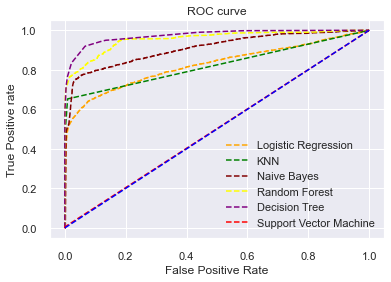

In [27]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='maroon', label='Naive Bayes')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='Random Forest')
plt.plot(fpr5, tpr5, linestyle='--',color='purple', label='Decision Tree')
plt.plot(fpr6, tpr6, linestyle='--',color='red', label='Support Vector Machine')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=200)
plt.show();

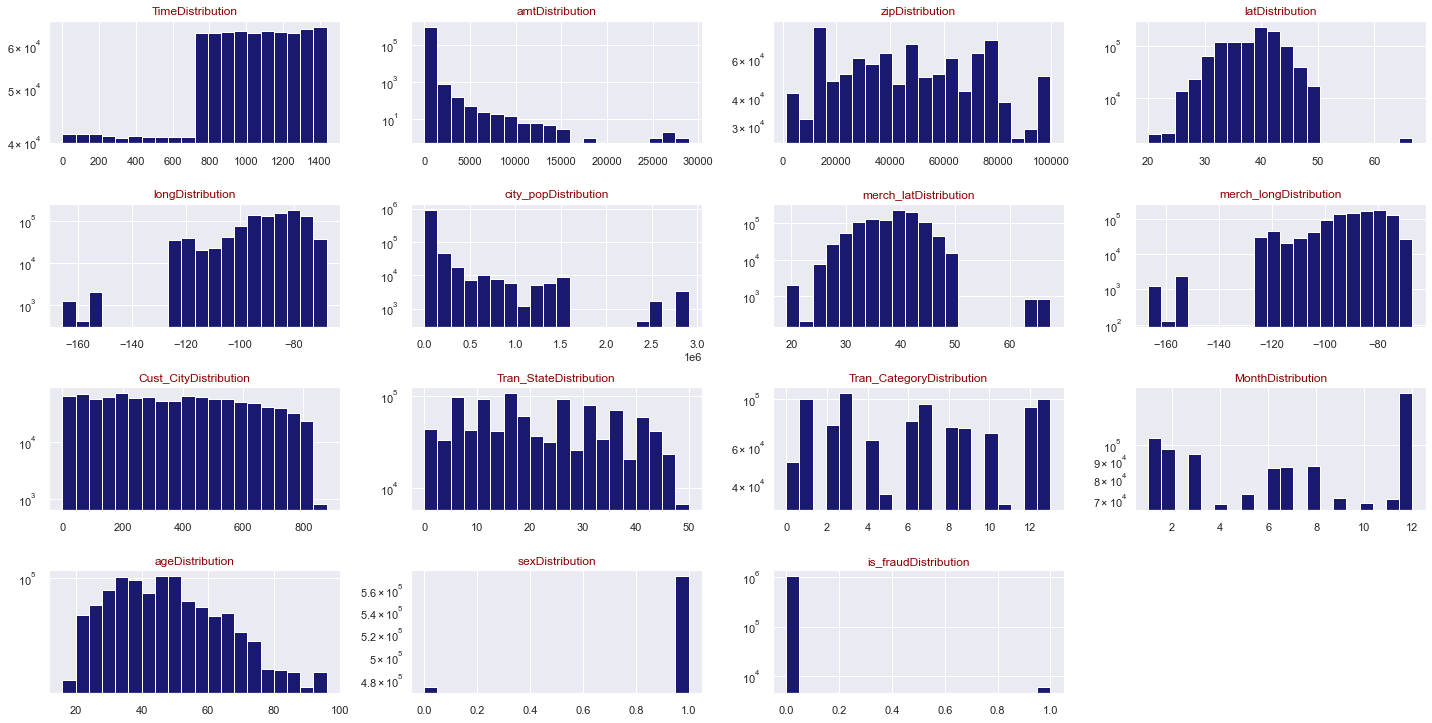

In [28]:
def draw_histograms(new_data, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        data[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+'Distribution',color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()
draw_histograms(data,data.columns,8,4)
     